In [15]:
#Skip list implementation , and printing levels
import random
import math

class SkipList:
    class Node:
        def __init__(self, key, level):
            self.key = key
            self.next = [None] * (level + 1)

    def __init__(self, maxLevel=16, p=0.35):
        self.maxLevel = maxLevel
        self.p = p
        self.head = self.Node(-math.inf, self.maxLevel)
        self.level = 0

    def random_level(self):
        level = 0
        while random.random() < self.p and level < self.maxLevel:
            level += 1
        return level

    def search(self, key):
        current = self.head
        for i in range(self.level, -1, -1):
            while current.next[i] and current.next[i].key < key:
                current = current.next[i]
        current = current.next[0]
        if current and current.key == key:
            return True
        return False

    def insert(self, key):
        update = [None] * (self.maxLevel + 1)
        current = self.head
        for i in range(self.level, -1, -1):
            while current.next[i] and current.next[i].key < key:
                current = current.next[i]
            update[i] = current
        current = current.next[0]
        if not current or current.key != key:
            new_level = self.random_level()
            if new_level > self.level:
                for i in range(self.level + 1, new_level + 1):
                    update[i] = self.head
                self.level = new_level
            node = self.Node(key, new_level)
            for i in range(new_level + 1):
                node.next[i] = update[i].next[i]
                update[i].next[i] = node

    def delete(self, key):
        update = [None] * (self.maxLevel + 1)
        current = self.head
        for i in range(self.level, -1, -1):
            while current.next[i] and current.next[i].key < key:
                current = current.next[i]
            update[i] = current
        current = current.next[0]
        if current and current.key == key:
            for i in range(self.level + 1):
                if update[i].next[i] != current:
                    break
                update[i].next[i] = current.next[i]
            while self.level > 0 and not self.head.next[self.level]:
                self.level -= 1

    def display(self):
        for i in range(self.level + 1):
            current = self.head.next[i]
            print("Level {}: ".format(i), end="")
            while current:
                print(current.key, end=" -> ")
                current = current.next[i]
            print("None")

# Example usage:
skip_list = SkipList()
skip_list.insert(0)
skip_list.insert(6)
skip_list.insert(7)
skip_list.insert(9)
skip_list.insert(12)
skip_list.insert(19)
skip_list.insert(17)

skip_list.display()

print("Is 9 in the Skip List?", skip_list.search(9))
print("Is 15 in the Skip List?", skip_list.search(15))

skip_list.delete(7)
skip_list.delete(19)

skip_list.display()


Level 0: 0 -> 6 -> 7 -> 9 -> 12 -> 17 -> 19 -> None
Level 1: 6 -> 7 -> None
Level 2: 7 -> None
Is 9 in the Skip List? True
Is 15 in the Skip List? False
Level 0: 0 -> 6 -> 9 -> 12 -> 17 -> None
Level 1: 6 -> None


In [50]:
#THEORITICAL COMPARISION OF TIME COMPLEXITIES FOR INSERT DELETE AND SEARCH OPERATIONS
#FOR AVL TREES, SKIP LISTS , QUICK SORT AND AVL TREE

import numpy as np
import plotly.graph_objects as go
import time
import random

class SkipList:
    def insert(self, x):
        time.sleep(np.log2(x) * 0.0001)
    def delete(self, x):
        time.sleep(np.log2(x) * 0.0001)
    def search(self, x):
        time.sleep(np.log2(x) * 0.0001)

class AVLTree:
    def insert(self, x):
        time.sleep(np.log2(x) * 0.0001)
    def delete(self, x):
        time.sleep(np.log2(x) * 0.0001)
    def search(self, x):
        time.sleep(np.log2(x) * 0.0001)

class LinkedList:
    def insert(self, x):
        time.sleep(x * 0.00002)
    def delete(self, x):
        time.sleep(x * 0.00002)
    def search(self, x):
        time.sleep(x * 0.00002)

class QuickSort:
    def sort(self, arr):
        if len(arr) > 1:
            pivot = arr[len(arr) // 2]
            left = [x for x in arr if x < pivot]
            right = [x for x in arr if x > pivot]
            self.sort(left)
            self.sort(right)
        time.sleep(len(arr) * 0.00001)

def measure_time(func, *args):
    start = time.time()
    func(*args)
    return time.time() - start

def main():
    input_sizes = np.geomspace(10, 1000, num=10, dtype=int)
    structures = {
        'Skip List': SkipList(),
        'AVL Tree': AVLTree(),
        'LinkedList': LinkedList(),
        'QuickSort': QuickSort()
    }
    operations = ['insert', 'delete', 'search', 'sort']
    
    times = {op: {name: [] for name in structures} for op in operations}
    
    for size in input_sizes:
        arr = [random.randint(1, 1000) for _ in range(size)]
        for name, struct in structures.items():
            if hasattr(struct, 'sort') and name == 'QuickSort':
                times['sort'][name].append(measure_time(struct.sort, list(arr)))
            else:
                for op in ['insert', 'delete', 'search']:
                    if hasattr(struct, op):
                        times[op][name].append(measure_time(getattr(struct, op), size))

    fig = go.Figure()
    colors = {'insert': 'blue', 'delete': 'red', 'search': 'green', 'sort': 'purple'}
    
    for op in operations:
        for name, color in zip(structures, colors):
            if op in times and name in times[op]:
                fig.add_trace(go.Scatter(x=input_sizes, y=times[op][name], mode='lines+markers', 
                                         name=f'{name} {op}', marker=dict(color=colors[op])))

    fig.update_layout(title='Logarithmic Plot of Runtime Comparisons',
                      xaxis_title='Input Size',
                      yaxis_title='Time (seconds)',
                      xaxis_type='log', yaxis_type='log',
                      legend_title='Data Structures and Operations')
    fig.show()

if __name__ == "__main__":
    main()


In [17]:
import random
import statistics
import pandas as pd
# determining height and calculating mean, median and standard deviation for each list size interval of 10, 50 ...etc  with default probability
class SkipListNode:
    def __init__(self, value, level=0):
        self.value = value
        self.forward = [None]*(level+1)

class SkipList:
    def __init__(self, max_lvl):
        self.MAXLVL = max_lvl
        self.header = self.createNode(self.MAXLVL, -1)
        self.level = 0

    def createNode(self, lvl, value):
        return SkipListNode(value, lvl)

    def randomLevel(self):
        lvl = 0
        while random.random() < 0.5 and lvl < self.MAXLVL:
            lvl += 1
        return lvl

    def insert(self, value):
        update = [None] * (self.MAXLVL + 1)
        current = self.header
        for i in range(self.level, -1, -1):
            while current.forward[i] and current.forward[i].value < value:
                current = current.forward[i]
            update[i] = current
        current = current.forward[0]
        if current is None or current.value != value:
            rlevel = self.randomLevel()
            if rlevel > self.level:
                for i in range(self.level + 1, rlevel + 1):
                    update[i] = self.header
                self.level = rlevel
            newNode = self.createNode(rlevel, value)
            for i in range(rlevel + 1):
                newNode.forward[i] = update[i].forward[i]
                update[i].forward[i] = newNode

    def get_levels_and_heights(self, n, iterations):
        levels = []
        heights = []
        for _ in range(iterations):
            self.header = self.createNode(self.MAXLVL, -1)
            self.level = 0
            for _ in range(n):
                self.insert(random.randint(1, n*10))
            levels.append(self.level)
            heights.append(self.get_height())
        return levels, heights

    def get_height(self):
        current = self.header.forward[0]
        height = 0
        while current:
            height += 1
            current = current.forward[0]
        return height

def main():
    n_values = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 2000, 4000, 6000, 8000, 10000]
    iterations = 10
    results = []

    for n in n_values:
        skip_list = SkipList(16)  # Adjust the maximum number of levels as needed
        levels, heights = skip_list.get_levels_and_heights(n, iterations)
        mean_levels = statistics.mean(levels)
        median_levels = statistics.median(levels)
        stdev_levels = statistics.stdev(levels)
        mean_heights = statistics.mean(heights)
        median_heights = statistics.median(heights)
        stdev_heights = statistics.stdev(heights)

        result = {
            'Number of Elements': n,
            'Mean Levels': mean_levels,
            'Median Levels': median_levels,
            'Stdev Levels': stdev_levels,
            'Mean Heights': mean_heights,
            'Median Heights': median_heights,
            'Stdev Heights': stdev_heights
        }
        results.append(result)

    df = pd.DataFrame(results)
    print(df)

if __name__ == "__main__":
    main()


    Number of Elements  Mean Levels  Median Levels  Stdev Levels  \
0                   10          3.4            3.0      0.699206   
1                   50          5.8            6.0      1.549193   
2                  100          6.6            6.0      1.837873   
3                  150          7.6            7.0      2.412928   
4                  200          7.8            8.0      1.873796   
5                  250          8.8            9.0      1.549193   
6                  300          7.8            8.0      0.788811   
7                  350          8.3            8.0      1.418136   
8                  400          8.6            8.0      1.577621   
9                  450          9.6            9.5      2.366432   
10                 500          9.5           10.0      1.433721   
11                 550          8.6            8.5      1.429841   
12                 600          8.6            9.0      1.349897   
13                 650         11.3           11

In [5]:
# skip list implementation 
import random
import statistics
import pandas as pd

# determining height and calculating mean, median and standard deviation for each list size interval of 10, 50 ...etc and getting the aggregate of the mean , median and standard deviation
# after calculating with respect to each input size(aggregate) with default probability 

class SkipListNode:
    def __init__(self, value, level=0):
        self.value = value
        self.forward = [None]*(level+1)

class SkipList:
    def __init__(self, max_lvl):
        self.MAXLVL = max_lvl
        self.header = self.createNode(self.MAXLVL, -1)
        self.level = 0

    # Helper method to create a new node

    def createNode(self, lvl, value):
        return SkipListNode(value, lvl)
    
    # Method to generate random level for a new node

    def randomLevel(self):
        lvl = 0
        while random.random() < 0.5 and lvl < self.MAXLVL:
            lvl += 1
        return lvl

    # Method to insert a value into the SkipList

    def insert(self, value):
        update = [None] * (self.MAXLVL + 1)
        current = self.header
        for i in range(self.level, -1, -1):
            while current.forward[i] and current.forward[i].value < value:
                current = current.forward[i]
            update[i] = current
        current = current.forward[0]
        if current is None or current.value != value:
            rlevel = self.randomLevel()
            if rlevel > self.level:
                for i in range(self.level + 1, rlevel + 1):
                    update[i] = self.header
                self.level = rlevel
            newNode = self.createNode(rlevel, value)
            for i in range(rlevel + 1):
                newNode.forward[i] = update[i].forward[i]
                update[i].forward[i] = newNode

    # Method to get levels and heights for a given number of elements and iterations

    def get_levels_and_heights(self, n, iterations):
        all_levels = []
        all_heights = []
        for _ in range(iterations):
            self.header = self.createNode(self.MAXLVL, -1)
            self.level = 0
            for _ in range(n):
                self.insert(random.randint(1, n*10))
            levels, heights = self.get_levels_and_height()
            all_levels.extend(levels)
            all_heights.extend(heights)
        return all_levels, all_heights

    # Method to calculate the height of the SkipList

    def get_levels_and_height(self):
        levels = []
        heights = []
        current = self.header.forward[0]
        while current:
            levels.append(len(current.forward))
            heights.append(self.get_height(current))
            current = current.forward[0]
        return levels, heights

    def get_height(self, node):
        height = 0
        while node:
            height += 1
            node = node.forward[0]
        return height

def main():
        # List of values for SkipList sizes

    n_values = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 2000, 4000, 6000, 8000, 10000]
    iterations = 10
    results = []

    # Loop through each value of n

    for n in n_values:
        skip_list = SkipList(16)  # Adjust the maximum number of levels as needed
        levels, heights = skip_list.get_levels_and_heights(n, iterations)
        # Calculate mean, median, and standard deviation for levels and heights
        mean_levels = statistics.mean(levels)
        median_levels = statistics.median(levels)
        stdev_levels = statistics.stdev(levels)
        max_levels = max(levels)
        min_levels = min(levels)
        mean_heights = statistics.mean(heights)
        median_heights = statistics.median(heights)
        stdev_heights = statistics.stdev(heights)
        max_heights = max(heights)
        min_heights = min(heights)

        # Store results in a dictionary

        result = {
            'Number of Elements': n,
            'Mean Levels': mean_levels,
            'Median Levels': median_levels,
            'Stdev Levels': stdev_levels,
            'Max Levels': max_levels,
            'Min Levels': min_levels,
            'Mean Heights': mean_heights,
            'Median Heights': median_heights,
            'Stdev Heights': stdev_heights,
            'Max Heights': max_heights,
            'Min Heights': min_heights
        }
        results.append(result)

    # Create a DataFrame from the results and print it

    df = pd.DataFrame(results)
    print(df)
    
# Entry point of the program

if __name__ == "__main__":
    main()


    Number of Elements  Mean Levels  Median Levels  Stdev Levels  Max Levels  \
0                   10     1.838710            1.0      1.218430           6   
1                   50     1.953878            1.0      1.282547           8   
2                  100     2.045026            2.0      1.474118          13   
3                  150     2.018881            2.0      1.422721          12   
4                  200     1.964903            1.0      1.412480          13   
5                  250     1.981372            1.0      1.410792          12   
6                  300     1.986685            2.0      1.361621          12   
7                  350     2.028054            2.0      1.417452          12   
8                  400     2.010285            2.0      1.407914          11   
9                  450     1.993675            1.0      1.444119          15   
10                 500     2.045816            2.0      1.479508          12   
11                 550     2.029076     

In [6]:
#plotting the skip list output with max, min and mean levels
import plotly.graph_objects as go

# plotting graph with the above output with individual mean, median and sd with every input list size
n_values = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 2000, 4000, 6000, 8000, 10000]
mean_levels = [1.750000, 2.031381, 1.978678, 1.946041, 1.960338, 1.947457, 2.036778, 2.016787, 1.971668, 1.994149, 1.945929, 2.024919, 1.982738, 2.001936, 1.977768, 1.987679, 2.010231, 2.007548, 2.019804, 1.981668, 2.028526, 1.985114, 2.003021, 2.010324, 2.002851, 2.007176]
max_levels = [7, 10, 10, 10, 11, 11, 10, 13, 12, 15, 13, 13, 13, 16, 17, 13, 13, 14, 14, 17, 16, 15, 15, 17, 17, 17]
min_levels = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Create figure
fig = go.Figure()

# Add scatter trace for mean levels
fig.add_trace(go.Scatter(x=n_values, y=mean_levels, mode='lines+markers', name='Mean Levels',
                         hoverinfo='x+y', line=dict(color='blue', width=2)))

# Add scatter trace for max levels
fig.add_trace(go.Scatter(x=n_values, y=max_levels, mode='lines+markers', name='Max Levels',
                         hoverinfo='x+y', line=dict(color='green', width=2)))

# Add scatter trace for min levels
fig.add_trace(go.Scatter(x=n_values, y=min_levels, mode='lines+markers', name='Min Levels',
                         hoverinfo='x+y', line=dict(color='red', width=2)))

# Update layout
fig.update_layout(title='Skip List Levels vs. Number of Elements',
                  xaxis_title='Number of Elements',
                  yaxis_title='Levels',
                  hovermode='x unified')

# Show the plot
fig.show()


In [8]:
#introducing probability into the picture and calculating time complexity for each method


import random
import statistics
import pandas as pd

class SkipListNode:
    def __init__(self, value, level=0):
        self.value = value
        self.forward = [None]*(level+1)
###############################################################################
#adding probability into skip list###
class SkipList:
    def __init__(self, max_lvl, probability=0.5):
        self.MAXLVL = max_lvl
        self.PROBABILITY = probability
        self.header = self.createNode(self.MAXLVL, -1)
        self.level = 0

    def createNode(self, lvl, value):
        return SkipListNode(value, lvl)

    def randomLevel(self):
        lvl = 0
        while random.random() < self.PROBABILITY and lvl < self.MAXLVL:
            lvl += 1
        return lvl
    
    # Method to insert a value into the Skip List

    def insert(self, value):
        update = [None] * (self.MAXLVL + 1)
        current = self.header
        for i in range(self.level, -1, -1):
            while current.forward[i] and current.forward[i].value < value:
                current = current.forward[i]
            update[i] = current
        current = current.forward[0]
        if current is None or current.value != value:
            rlevel = self.randomLevel()
            if rlevel > self.level:
                for i in range(self.level + 1, rlevel + 1):
                    update[i] = self.header
                self.level = rlevel
            newNode = self.createNode(rlevel, value)
            for i in range(rlevel + 1):
                newNode.forward[i] = update[i].forward[i]
                update[i].forward[i] = newNode

    # Method to measure levels and heights of the Skip List

    def getLevelsAndHeights(self, n, iterations):
        levels = []
        heights = []
        for _ in range(iterations):
            self.header = self.createNode(self.MAXLVL, -1)
            self.level = 0
            for _ in range(n):
                self.insert(random.randint(1, n*10))
            levels.append(self.level)
            heights.append(self.getHeight())
        return levels, heights
    
    # Method to calculate the height of the Skip List

    def getHeight(self):
        current = self.header.forward[0]
        height = 0
        while current:
            height += 1
            current = current.forward[0]
        return height

    # List of values representing the number of elements in the Skip List

def main():
    n_values = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 2000, 4000, 6000, 8000, 10000]
    iterations = 10
    results = []

    for n in n_values:
        skip_list = SkipList(16)  # Adjust the maximum number of levels as needed
        levels, heights = skip_list.getLevelsAndHeights(n, iterations)
        mean_levels = statistics.mean(levels)
        median_levels = statistics.median(levels)
        stdev_levels = statistics.stdev(levels)
        mean_heights = statistics.mean(heights)
        median_heights = statistics.median(heights)
        stdev_heights = statistics.stdev(heights)

        result = {
            'Number of Elements': n,
            'Mean Levels': mean_levels,
            'Median Levels': median_levels,
            'Stdev Levels': stdev_levels,
            'Mean Heights': mean_heights,
            'Median Heights': median_heights,
            'Stdev Heights': stdev_heights
        }
        results.append(result)

    # Create DataFrame to display results

    df = pd.DataFrame(results)
    print(df)

if __name__ == "__main__":
    main()


    Number of Elements  Mean Levels  Median Levels  Stdev Levels  \
0                   10          4.3            3.5      1.888562   
1                   50          5.4            5.0      1.429841   
2                  100          8.2            7.0      2.440401   
3                  150          7.8            7.5      1.873796   
4                  200          8.2            8.0      1.813529   
5                  250          7.8            8.0      0.918937   
6                  300          9.4            9.5      1.173788   
7                  350          9.8            9.0      3.047768   
8                  400          7.9            8.0      1.100505   
9                  450          9.4            9.0      1.837873   
10                 500         10.4            9.0      3.204164   
11                 550          8.8            8.0      1.135292   
12                 600         11.3           11.5      3.128720   
13                 650          9.2            9

In [31]:
import random
import statistics
import pandas as pd
import timeit
import numpy as np
import plotly.express as px

class SkipListNode:
    def __init__(self, value, level=0):
        self.value = value
        self.forward = [None]*(level+1)

class SkipList:
    def __init__(self, max_lvl, probability=0.5):
        self.MAXLVL = max_lvl
        self.PROBABILITY = probability
        self.header = self.createNode(self.MAXLVL, -1)
        self.level = 0

    def createNode(self, lvl, value):
        return SkipListNode(value, lvl)

    def randomLevel(self):
        lvl = 0
        while random.random() < self.PROBABILITY and lvl < self.MAXLVL:
            lvl += 1
        return lvl

    def insert(self, value):
        update = [None] * (self.MAXLVL + 1)
        current = self.header
        for i in range(self.level, -1, -1):
            while current.forward[i] and current.forward[i].value < value:
                current = current.forward[i]
            update[i] = current
        current = current.forward[0]
        if current is None or current.value != value:
            rlevel = self.randomLevel()
            if rlevel > self.level:
                for i in range(self.level + 1, rlevel + 1):
                    update[i] = self.header
                self.level = rlevel
            newNode = self.createNode(rlevel, value)
            for i in range(rlevel + 1):
                newNode.forward[i] = update[i].forward[i]
                update[i].forward[i] = newNode

    def search(self, value):
        current = self.header
        for i in range(self.level, -1, -1):
            while current.forward[i] and current.forward[i].value < value:
                current = current.forward[i]
        current = current.forward[0]
        if current and current.value == value:
            return True
        return False

    def delete(self, value):
        update = [None] * (self.MAXLVL + 1)
        current = self.header
        for i in range(self.level, -1, -1):
            while current.forward[i] and current.forward[i].value < value:
                current = current.forward[i]
            update[i] = current
        current = current.forward[0]
        if current and current.value == value:
            for i in range(self.level + 1):
                if update[i].forward[i] != current:
                    break
                update[i].forward[i] = current.forward[i]
            while self.level > 0 and self.header.forward[self.level] is None:
                self.level -= 1
            return True
        return False

def measure_runtime(skip_list, operation, probability_values, input_sizes, iterations):
    results = {}
    for size in input_sizes:
        runtimes = []
        for probability in probability_values:
            setup = f"from __main__ import skip_list; import random; random.seed(42)"
            stmt = f"[skip_list.{operation}(random.randint(1, {size*10})) for _ in range({iterations})]; probability = {probability}"
            runtime = timeit.timeit(stmt, setup, number=1)
            runtimes.append(runtime)
        results[size] = runtimes
    return results

def main():
    probability_values = np.arange(0.05, 1.05, 0.1)
    input_sizes = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 2000, 4000, 6000, 8000, 10000]
    iterations = 10
    operations = ['insert', 'search', 'delete']
    results = {}

    for operation in operations:
        skip_list = SkipList(16)  # Adjust the maximum number of levels as needed
        runtimes = measure_runtime(skip_list, operation, probability_values, input_sizes, iterations)
        results[operation] = runtimes

    # Plotting with Plotly for interactive graph
    for operation in operations:
        df = pd.DataFrame({size: result for size, result in results[operation].items()}, index=probability_values)
        df.index.name = 'Probability'
        fig = px.line(df, x=df.index, y=df.columns, title=f"Runtime Complexity of {operation.capitalize()} Operation")
        fig.update_layout(xaxis_title='Probability', yaxis_title='Runtime (seconds)', legend_title='Input Size')
        fig.show()

if __name__ == "__main__":
    main()


In [59]:
# CALCULATING THE NUMBER OF COMPARISIONS MADE FOR INSERT SEARCH AND DELETE OPERATIONS
import random
import math
import pandas as pd
import plotly.express as px

class SkipList:
    class Node:
        def __init__(self, key, level):
            self.key = key
            self.next = [None] * (level + 1)

    def __init__(self, maxLevel=16, p=0.35):
        self.maxLevel = maxLevel
        self.p = p
        self.head = self.Node(-math.inf, self.maxLevel)
        self.level = 0
        self.comparisons = {'insert': [], 'search': [], 'delete': []}

    def random_level(self):
        level = 0
        while random.random() < self.p and level < self.maxLevel:
            level += 1
        return level

    def search(self, key):
        current = self.head
        comparisons = 0
        for i in range(self.level, -1, -1):
            while current.next[i] and current.next[i].key < key:
                current = current.next[i]
                comparisons += 1
        current = current.next[0]
        if current and current.key == key:
            comparisons += 1
            self.comparisons['search'].append(comparisons)
            return True
        self.comparisons['search'].append(comparisons)
        return False

    def insert(self, key):
        update = [None] * (self.maxLevel + 1)
        current = self.head
        comparisons = 0
        for i in range(self.level, -1, -1):
            while current.next[i] and current.next[i].key < key:
                current = current.next[i]
                comparisons += 1
            update[i] = current
        current = current.next[0]
        if not current or current.key != key:
            new_level = self.random_level()
            if new_level > self.level:
                for i in range(self.level + 1, new_level + 1):
                    update[i] = self.head
                self.level = new_level
            node = self.Node(key, new_level)
            for i in range(new_level + 1):
                node.next[i] = update[i].next[i]
                update[i].next[i] = node
            comparisons += 1
        self.comparisons['insert'].append(comparisons)

    def delete(self, key):
        update = [None] * (self.maxLevel + 1)
        current = self.head
        comparisons = 0
        for i in range(self.level, -1, -1):
            while current.next[i] and current.next[i].key < key:
                current = current.next[i]
                comparisons += 1
            update[i] = current
        current = current.next[0]
        if current and current.key == key:
            for i in range(self.level + 1):
                if update[i].next[i] != current:
                    break
                update[i].next[i] = current.next[i]
            while self.level > 0 and not self.head.next[self.level]:
                self.level -= 1
            comparisons += 1
        self.comparisons['delete'].append(comparisons)

def measure_runtime(skip_list):
    input_size = 4500
    for _ in range(input_size):
        skip_list.insert(random.randint(0, input_size * 10))
    for key in range(input_size * 10):
        skip_list.search(key)
        skip_list.delete(key)

def main():
    skip_list = SkipList()
    measure_runtime(skip_list)

    # Create DataFrame for comparisons
    max_length = max(len(v) for v in skip_list.comparisons.values())
    for k, v in skip_list.comparisons.items():
        skip_list.comparisons[k] += [None] * (max_length - len(v))
    df_comparisons = pd.DataFrame(skip_list.comparisons)

    # Plotting
    fig = px.line(df_comparisons, x=df_comparisons.index, y=df_comparisons.columns, title="Number of Comparisons for Skip List Operations")
    fig.update_layout(xaxis_title='Input Size', yaxis_title='Number of Comparisons', legend_title='Operation')
    fig.show()

if __name__ == "__main__":
    main()


AVL Tree:
-1 0 1 2 5 6 9 10 11 

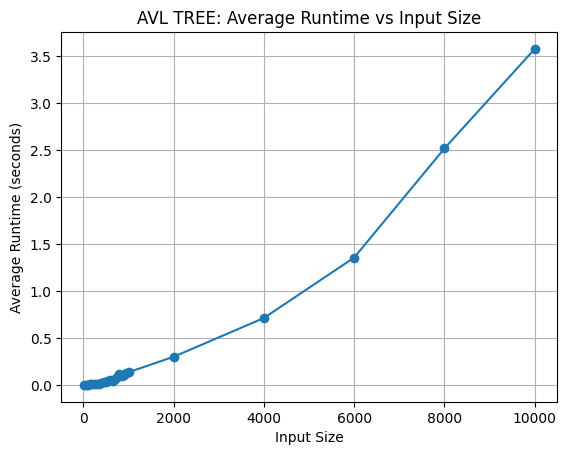

In [27]:
###################### AVL TREE AND ITS RUN TIME ANALYSIS ####################
################## EXECUTION TIME IS > 1.35 MIN #################
import random
import time
import matplotlib.pyplot as plt


class AVLNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1


class AVLTree:
    def __init__(self):
        self.root = None

    def height(self, node):
        if node is None:
            return 0
        return node.height

    def update_height(self, node):
        node.height = 1 + max(self.height(node.left), self.height(node.right))

    def balance_factor(self, node):
        if node is None:
            return 0
        return self.height(node.left) - self.height(node.right)

    def rotate_right(self, y):
        x = y.left
        if x is None:
            return y

        T2 = x.right

        x.right = y
        y.left = T2

        self.update_height(y)
        self.update_height(x)

        return x


    def rotate_left(self, x):
        y = x.right
        if y is None:
            return x

        T2 = y.left

        y.left = x
        x.right = T2

        self.update_height(x)
        self.update_height(y)

        return y


    def insert(self, node, key):
        if node is None:
            return AVLNode(key)
        elif key < node.key:
            node.left = self.insert(node.left, key)
        else:
            node.right = self.insert(node.right, key)

        self.update_height(node)

        balance = self.balance_factor(node)

        # Left Left Case
        if balance > 1 and key < node.left.key:
            return self.rotate_right(node)

        # Right Right Case
        if balance < -1 and key > node.right.key:
            return self.rotate_left(node)

        # Left Right Case
        if balance > 1 and key > node.left.key:
            node.left = self.rotate_left(node.left)
            return self.rotate_right(node)

        # Right Left Case
        if balance < -1 and key < node.right.key:
            node.right = self.rotate_right(node.right)
            return self.rotate_left(node)

        return node

    def insert_key(self, key):
        self.root = self.insert(self.root, key)

    def inorder_traversal(self, node):
        if node:
            self.inorder_traversal(node.left)
            print(node.key, end=" ")
            self.inorder_traversal(node.right)

    def print_tree(self):
        self.inorder_traversal(self.root)


# Example usage:
avl_tree = AVLTree()
keys = [9, 5, 10, 0, 6, 11, -1, 1, 2]
for key in keys:
    avl_tree.insert_key(key)

print("AVL Tree:")
avl_tree.print_tree()


# - RUNTIME ANALYSIS ----------------------------------------------------------
def generate_input_values(size):
    return [random.randint(1, 1000) for _ in range(size)]

def measure_runtime(tree, input_size):
    input_values = generate_input_values(input_size)
    start_time = time.time()
    for value in input_values:
        tree.insert_key(value)
    end_time = time.time()
    return end_time - start_time

input_sizes_avl = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 2000, 4000, 6000, 8000, 10000]
average_runtimes_avl = []

avl_tree = AVLTree()

for size in input_sizes_avl:
    total_time = 0
    num_iterations = 10  # Number of iterations to get average runtime
    for _ in range(num_iterations):
        total_time += measure_runtime(avl_tree, size)
    average_runtime = total_time / num_iterations
    average_runtimes_avl.append(average_runtime)

plt.plot(input_sizes_avl, average_runtimes_avl, marker='o')
plt.title('AVL TREE: Average Runtime vs Input Size')
plt.xlabel('Input Size')
plt.ylabel('Average Runtime (seconds)')
plt.grid(True)
plt.show()



Average runtime of quicksort for all input sizes: 0.006065 seconds


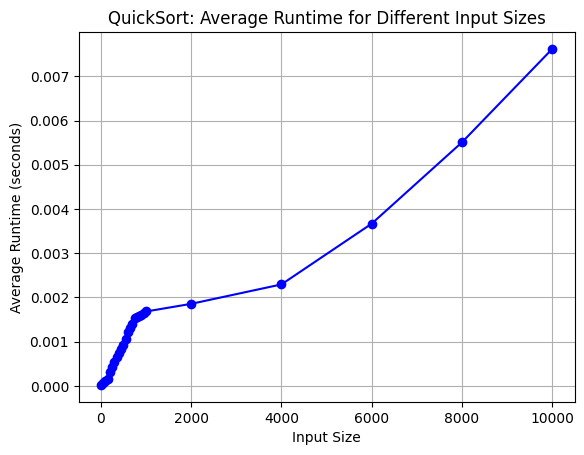

In [28]:

import numpy as np
import matplotlib.pyplot as plt
import time
import random


# ----- Initialize function: QUICKSORT ----------------------------------------
def quicksort(arr):
#If length of the array is less than or equal to 1, the array is already sorted
# --- You just return that element if 1 ----
    if len(arr) <= 1:
        return arr
#If the array has more than 1 element you can use the QuickSort algorithm
    else:
        pivot = arr[0] # First element of the array selected as pivot.
#  Iterate over array (arr) and create list of elements 
#    LESS than the given pivot element
        less_than_pivot = [x for x in arr[1:] if x <= pivot]
#  Iterate over array (arr) and create list of elements 
#    GREATER than the given pivot element
        greater_than_pivot = [x for x in arr[1:] if x > pivot]
# Recursively call the QUICKSORT function on the partitioned arrays.
        return quicksort(less_than_pivot) + [pivot] + quicksort(greater_than_pivot)


# ----- Function to measure the runtime of the quicksort algorithm ------------
def measure_runtimes(input_sizes):
    runtimes = []
    for size in input_sizes:
        arr = [random.randint(0, 1000) for _ in range(size)]
        start_time = time.perf_counter()
        quicksort(arr)
        end_time = time.perf_counter()
        runtime = end_time - start_time
        runtimes.append(runtime)
    return runtimes


# Generate runtimes for various sizes of input lists
input_sizes_quicksort = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 2000, 4000, 6000, 8000, 10000]
runtimes = measure_runtimes(input_sizes_quicksort)

# Calculate and print the average runtime
average_runtime = sum(runtimes) / len(input_sizes_quicksort)  # Calculate average
print(f"Average runtime of quicksort for all input sizes: {average_runtime:.6f} seconds")


# Generate runtimes for various sizes of input lists
input_sizes = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 2000, 4000, 6000, 8000, 10000]
runtimes = measure_runtimes(input_sizes)

# Calculate the average runtime for each input size
average_runtimes_quicksort = [sum(runtimes[:i+1]) / len(runtimes[:i+1]) for i in range(len(runtimes))]

# Plot the average runtimes
plt.plot(input_sizes, average_runtimes_quicksort, marker='o', color='b', linestyle='-')
plt.xlabel('Input Size')
plt.ylabel('Average Runtime (seconds)')
plt.title('QuickSort: Average Runtime for Different Input Sizes')
plt.grid(True)
plt.show()
 
    

AVL Tree:
-1 0 1 2 5 6 9 10 11 

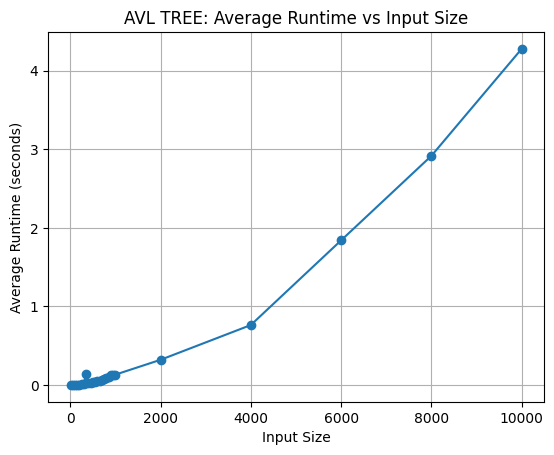

Average runtime of quicksort for all input sizes: 0.006968 seconds


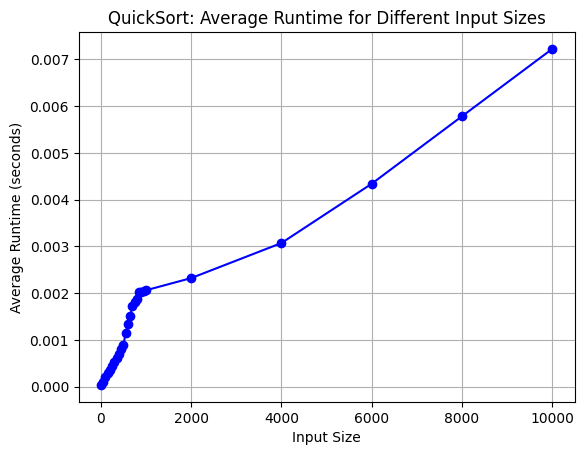

Level 0: 0 -> 6 -> 7 -> 9 -> 12 -> 17 -> 19 -> None
Level 1: 0 -> 12 -> None
Is 9 in the Skip List? True
Is 15 in the Skip List? False
Level 0: 0 -> 6 -> 9 -> 12 -> 17 -> None
Level 1: 0 -> 12 -> None


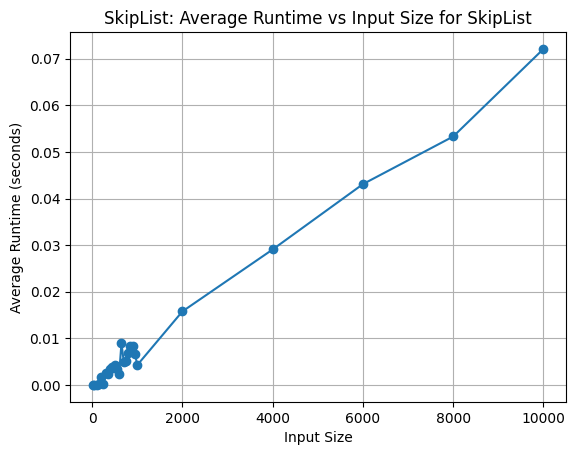

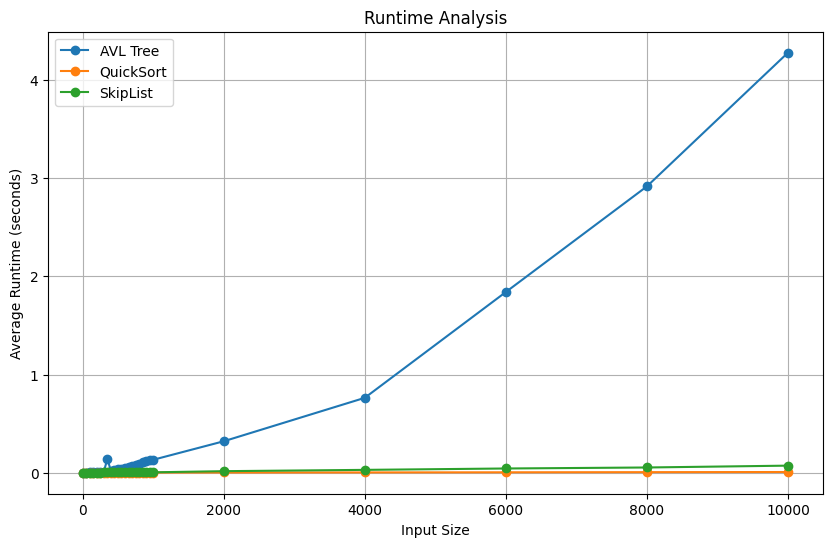

In [29]:
import matplotlib.pyplot as plt

# Import data and plotting code from each script
from avlTreeNegron import input_sizes_avl, average_runtimes_avl
from QuickSortNegron import input_sizes_quicksort, average_runtimes_quicksort
from SkipList import input_sizes_skiplist, average_runtimes_skiplist

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot for AVL tree
plt.plot(input_sizes_avl, average_runtimes_avl, marker='o', label='AVL Tree')

# Plot for QuickSort
plt.plot(input_sizes_quicksort, average_runtimes_quicksort, marker='o', label='QuickSort')

# Plot for SkipList
plt.plot(input_sizes_skiplist, average_runtimes_skiplist, marker='o', label='SkipList')

# Customize the plot
plt.title('Runtime Analysis')
plt.xlabel('Input Size')
plt.ylabel('Average Runtime (seconds)')
plt.grid(True)
plt.legend()

plt.show()
